In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

### Load Insurance Claim Dataset

In [47]:
insurance_df=pd.read_csv('Insuranceclaimsdata.csv')

In [48]:
insurance_df

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [49]:
insurance_df.shape

(58592, 41)

In [73]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

### Target column is claim_status. Look for unusual data in target column and other key columns

In [62]:
insurance_df['claim_status'].unique()

array([0, 1], dtype=int64)

In [61]:
insurance_df['subscription_length'].unique()

array([ 9.3,  8.2,  9.5,  5.2, 10.1,  3.1,  4.5, 10.7,  0.3, 10.5,  5.3,
       10.2,  1.4,  5.6, 10.3,  8.8,  0.7,  2.4,  9.7, 11.6,  0.9,  1.2,
        1.3, 12.4,  6.8, 10.9,  7.7,  8.3,  0.8, 10.6,  2.8,  0.2, 11.8,
        6.4,  4.3, 12.1,  5.5,  2.6,  1.8,  4.6,  2.7,  2.2,  0.4, 11.7,
       12.2,  3.8,  0.5,  5. ,  2. ,  0.6,  1. ,  1.1,  4.9,  1.5, 11.2,
       11.1, 12.3,  8.5,  0.1,  7.4,  4.4,  2.1,  7.6,  5.1,  5.7,  3.4,
        3.2,  8.1,  3. ,  8.7,  6.5, 10.4,  9.2,  9.6, 10.8,  9.8,  1.6,
        3.5, 11.9,  0. ,  8.6,  5.4,  9. ,  6.6,  6.3,  5.8,  7.1,  2.9,
       11.3,  3.6, 10. ,  1.7,  7.3,  8.9, 11.4,  2.5,  6. , 12.5,  7. ,
        6.2,  4. ,  7.8,  7.2,  6.7, 11.5,  2.3,  7.9,  3.3, 11. , 12. ,
        4.1,  7.5,  3.7,  4.2,  8. ,  5.9,  3.9,  4.8,  8.4,  9.4,  6.1,
        9.9,  4.7,  1.9,  6.9,  9.1, 13.1, 13.2, 13.5, 12.9, 13.9, 12.7,
       13.4, 12.6, 13.7, 13.8, 12.8, 13.3, 13.6, 14. ])

In [57]:
target_col='claim_status'

In [51]:
col=insurance_df.subscription_length

In [54]:
col_to_compare = ['vehicle_age', 'customer_age', 'region_density', 'subscription_length'] 

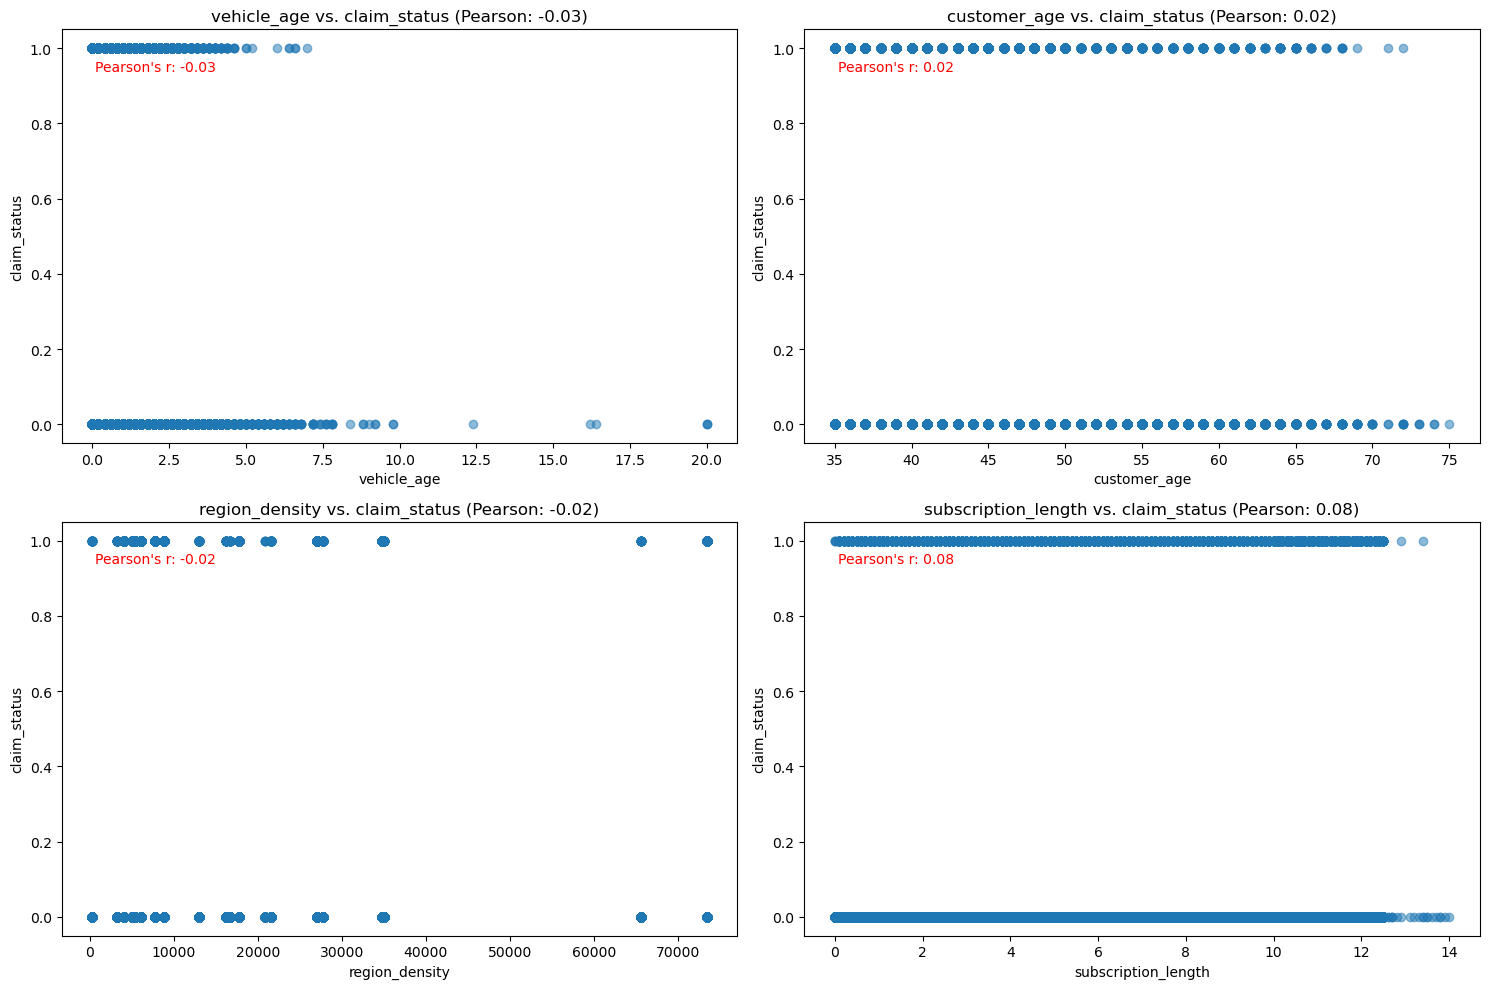

In [58]:
plt.figure(figsize=(15, 10))
num_plots = len(col_to_compare)
for i, col in enumerate(col_to_compare, 1):# Loop through the columns and create scatter plots with correlation
    # Calculate Pearson correlation
    if col in insurance_df.columns and target_col in insurance_df.columns:
        x = insurance_df[col]
        y = insurance_df[target_col]
        pearson_corr, _ = pearsonr(x, y)
        plt.subplot((num_plots + 1) // 2, 2, i)  # Adjust grid layout for each subplot
        plt.scatter(x, y, alpha=0.5)
        plt.title(f'{col} vs. {target_col} (Pearson: {pearson_corr:.2f})')
        plt.xlabel(col)
        plt.ylabel(target_col)
        
        plt.text(0.05, 0.9, f"Pearson's r: {pearson_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, color='red')# Display the correlation coefficient on each plot
        
plt.tight_layout()
plt.show()

### Claim_status is strongly correlated to Subscription Length.

# CAR INSURANCE EDA

## Load the dataset and describe the data

In [3]:
insurance_df=pd.read_csv('Insuranceclaimsdata.csv') # Load the data

In [4]:
insurance_df.head() # Display the data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
insurance_df.info() # Display the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

### From above we can list down the numerical data and categorical data

### Numerical- subscription_length, vehicle_age, customer_age, region_density, airbags
### Categorical- region_code, segment , model, fuel_type, max_torque, max_power, engine_type
### Boolean- is_brake_assist, is_power_door_locks, is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw (Emergency Collision Warning), is_speed_alert, ncap_rating, claim_status

In [7]:
insurance_df.describe() # Display the summary Statistics

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


## Analyse the missing values

In [8]:
missing_values=insurance_df.isnull().sum()

In [9]:
missing_values

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

### The above dataset doesn't have any missing values hence imputation is not required ( Show few imputation techniques for categorical and numerical values)

In [11]:
insurance_df.nunique()

policy_id                           58592
subscription_length                   140
vehicle_age                            49
customer_age                           41
region_code                            22
region_density                         22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
steering_type                           3
turning_radius                    

In [13]:
insurance_df['segment'].unique()

array(['C2', 'C1', 'A', 'B2', 'B1', 'Utility'], dtype=object)

In [14]:
insurance_df['claim_status'].unique()

array([0, 1], dtype=int64)

In [15]:
insurance_df['subscription_length'].unique()

array([ 9.3,  8.2,  9.5,  5.2, 10.1,  3.1,  4.5, 10.7,  0.3, 10.5,  5.3,
       10.2,  1.4,  5.6, 10.3,  8.8,  0.7,  2.4,  9.7, 11.6,  0.9,  1.2,
        1.3, 12.4,  6.8, 10.9,  7.7,  8.3,  0.8, 10.6,  2.8,  0.2, 11.8,
        6.4,  4.3, 12.1,  5.5,  2.6,  1.8,  4.6,  2.7,  2.2,  0.4, 11.7,
       12.2,  3.8,  0.5,  5. ,  2. ,  0.6,  1. ,  1.1,  4.9,  1.5, 11.2,
       11.1, 12.3,  8.5,  0.1,  7.4,  4.4,  2.1,  7.6,  5.1,  5.7,  3.4,
        3.2,  8.1,  3. ,  8.7,  6.5, 10.4,  9.2,  9.6, 10.8,  9.8,  1.6,
        3.5, 11.9,  0. ,  8.6,  5.4,  9. ,  6.6,  6.3,  5.8,  7.1,  2.9,
       11.3,  3.6, 10. ,  1.7,  7.3,  8.9, 11.4,  2.5,  6. , 12.5,  7. ,
        6.2,  4. ,  7.8,  7.2,  6.7, 11.5,  2.3,  7.9,  3.3, 11. , 12. ,
        4.1,  7.5,  3.7,  4.2,  8. ,  5.9,  3.9,  4.8,  8.4,  9.4,  6.1,
        9.9,  4.7,  1.9,  6.9,  9.1, 13.1, 13.2, 13.5, 12.9, 13.9, 12.7,
       13.4, 12.6, 13.7, 13.8, 12.8, 13.3, 13.6, 14. ])

In [16]:
insurance_df['segment'].value_counts()

segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64

## Univariate analysis

In [30]:
numerical_columns=['subscription_length','vehicle_age','customer_age','max_torque']

C:\Users\NASHRIAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NASHRIAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NASHRIAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NASHRIAT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

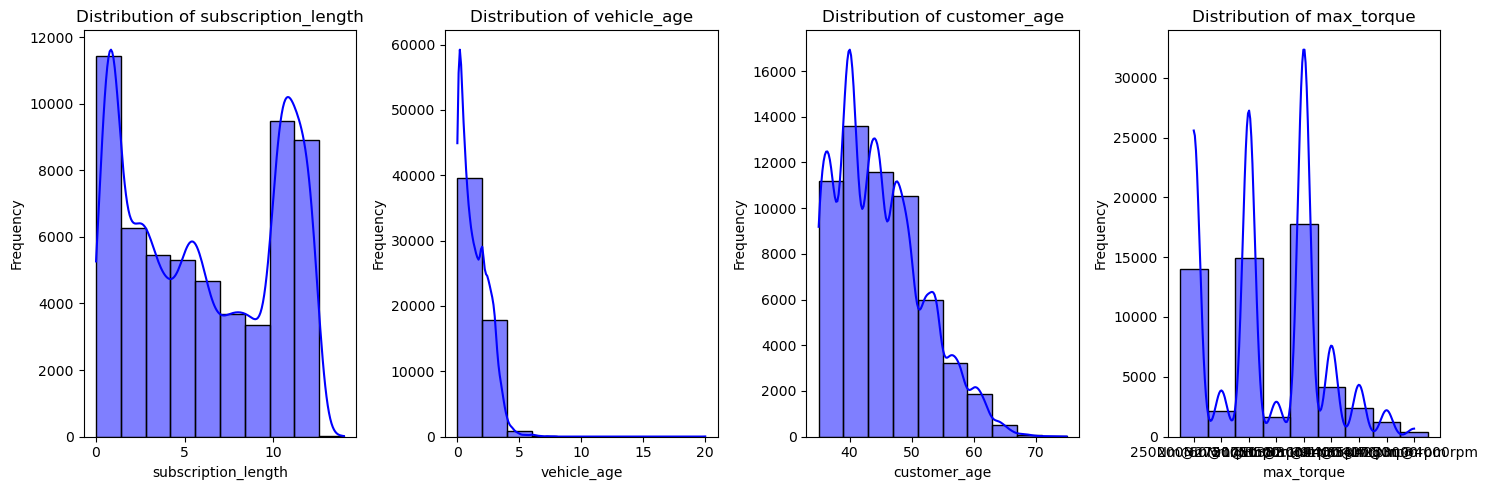

In [31]:
plt.figure(figsize=(15, 5))  # Adjust size of the plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(insurance_df[column], kde=True, bins=10, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

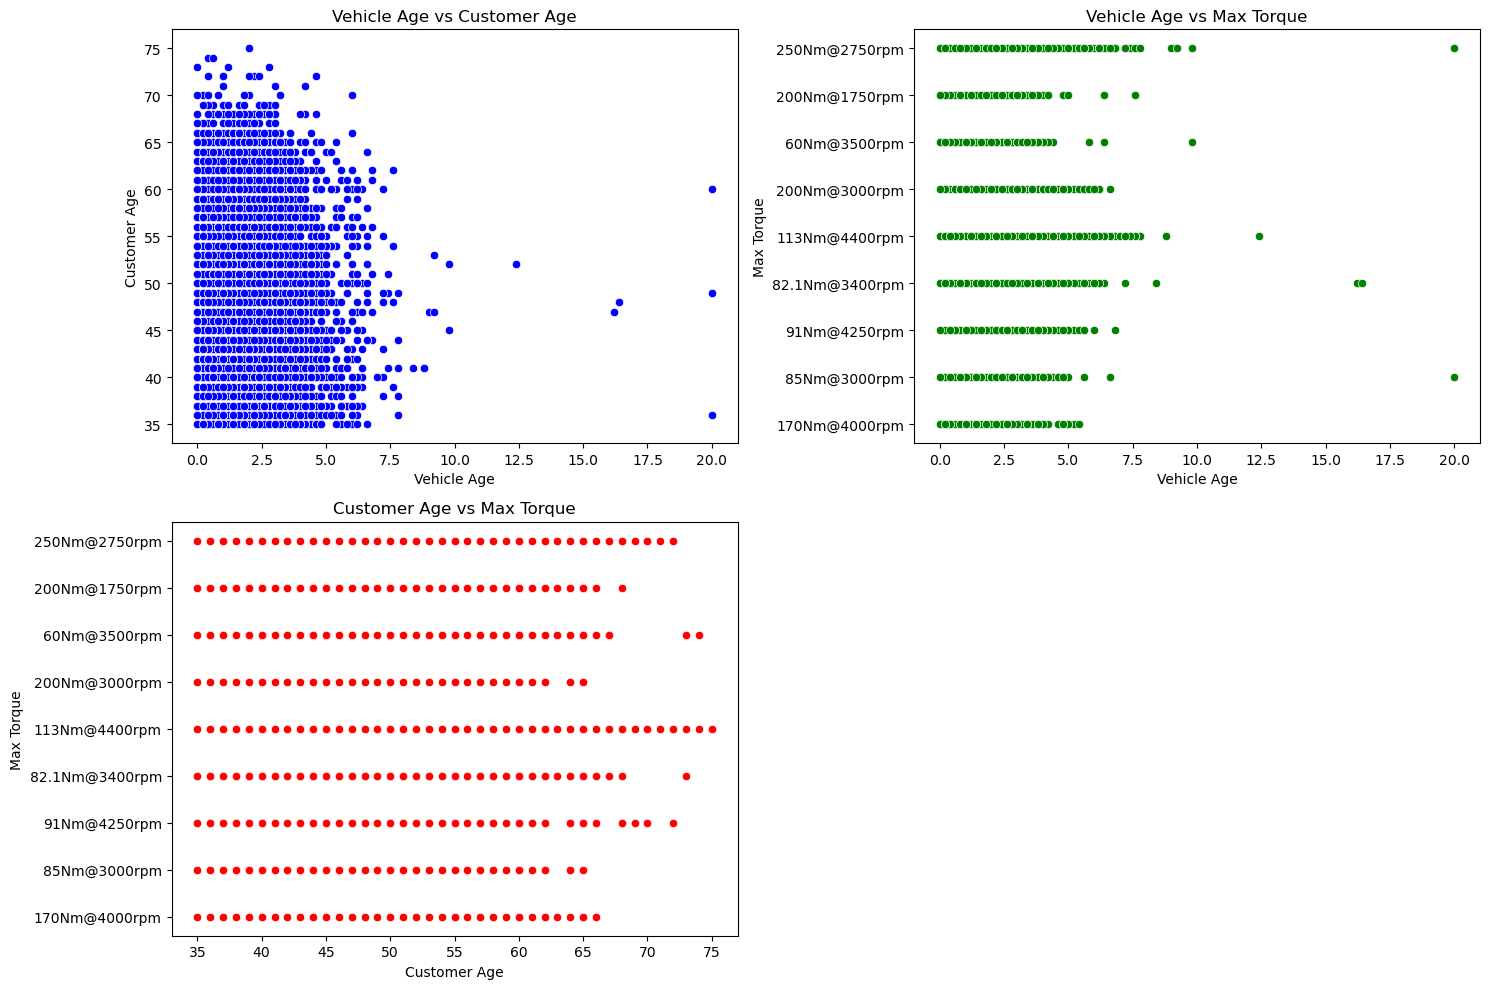

In [26]:
plt.figure(figsize=(15, 10))

# Scatterplot: vehicle_age vs customer_age
plt.subplot(2, 2, 1)
sns.scatterplot(data=insurance_df, x='vehicle_age', y='customer_age', color='blue')
plt.title('Vehicle Age vs Customer Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Customer Age')

# Scatterplot: vehicle_age vs max_torque
plt.subplot(2, 2, 2)
sns.scatterplot(data=insurance_df, x='vehicle_age', y='max_torque', color='green')
plt.title('Vehicle Age vs Max Torque')
plt.xlabel('Vehicle Age')
plt.ylabel('Max Torque')

# Scatterplot: customer_age vs max_torque
plt.subplot(2, 2, 3)
sns.scatterplot(data=insurance_df, x='customer_age', y='max_torque', color='red')
plt.title('Customer Age vs Max Torque')
plt.xlabel('Customer Age')
plt.ylabel('Max Torque')

plt.tight_layout()
plt.show()

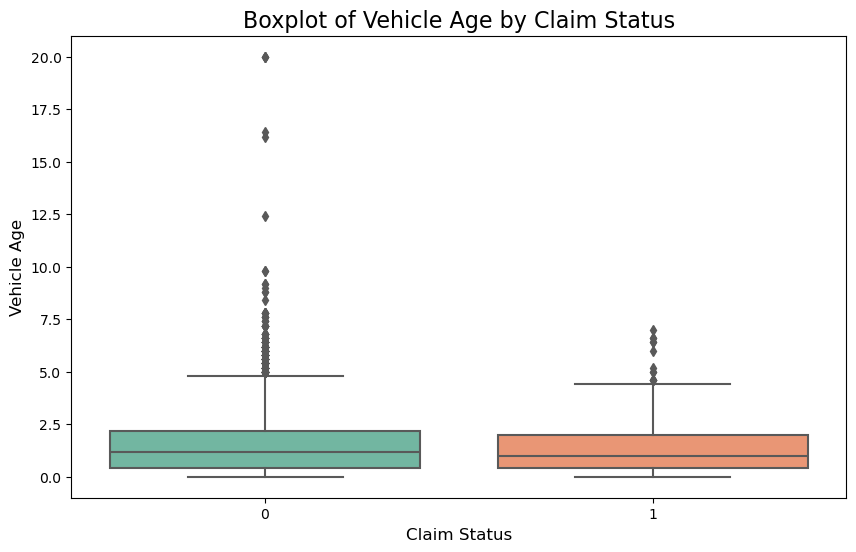

In [27]:
# Create a boxplot to visualize the distribution of vehicle_age for each claim_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='claim_status', y='vehicle_age', data=insurance_df, palette="Set2")
plt.title('Boxplot of Vehicle Age by Claim Status', fontsize=16)
plt.xlabel('Claim Status', fontsize=12)
plt.ylabel('Vehicle Age', fontsize=12)
plt.show()

C:\Users\NASHRIAT\AppData\Local\Temp\ipykernel_12592\2429652728.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_rate = insurance_df.groupby('vehicle_age_group')['claim_status'].mean()


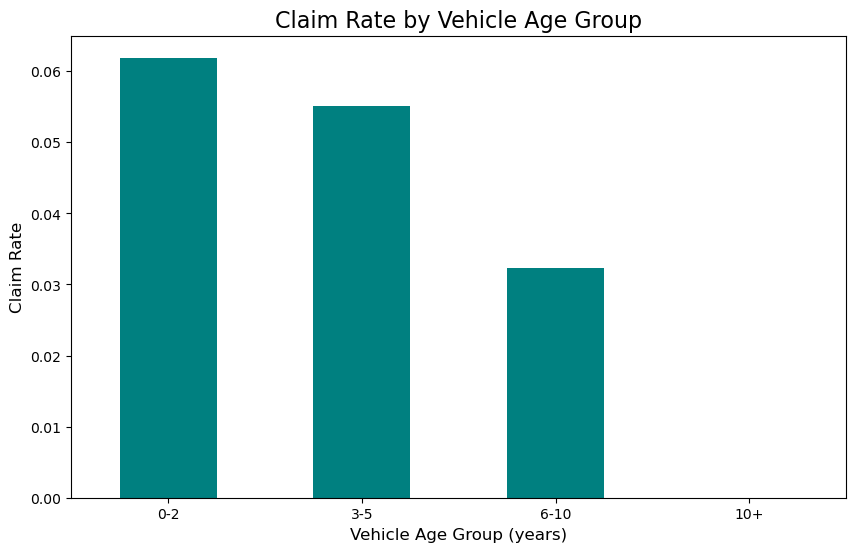

In [29]:
# Group vehicle ages into bins for a grouped bar plot
bins = [0, 2, 5, 10, 20]  # Define bins for vehicle ages
labels = ['0-2', '3-5', '6-10', '10+']
insurance_df['vehicle_age_group'] = pd.cut(insurance_df['vehicle_age'], bins=bins, labels=labels)

# Calculate the claim rate for each vehicle age group
claim_rate = insurance_df.groupby('vehicle_age_group')['claim_status'].mean()

# Plot claim rates for vehicle age groups
claim_rate.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Claim Rate by Vehicle Age Group', fontsize=16)
plt.xlabel('Vehicle Age Group (years)', fontsize=12)
plt.ylabel('Claim Rate', fontsize=12)
plt.xticks(rotation=0)
plt.show()

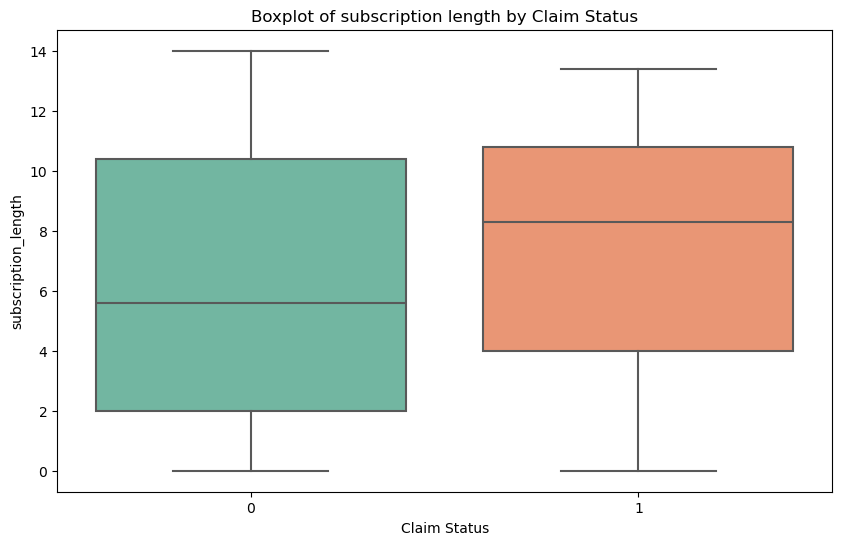

In [35]:
# Boxplot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_df, x='claim_status', y='subscription_length', palette="Set2")
plt.title("Boxplot of subscription length by Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("subscription_length")
plt.show()